<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [43]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Prepare Data

In [7]:

# Load and Prepare Data

# Load the datasets
train_data_path = '/train.csv'
test_data_path = '/test.csv'

# Load data into pandas DataFrame
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Display first few rows of train data
train_df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## EDA

In [19]:
# Apply isnull().sum() to check for missing values in the datasets
train_nulls = train_df.isnull().sum()
test_nulls = test_df.isnull().sum()

train_nulls, test_nulls


(season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 casual        0
 registered    0
 count         0
 year          0
 month         0
 day           0
 hour          0
 dtype: int64,
 datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 dtype: int64)

In [20]:
# Check for missing values
missing_values = train_df.isnull().sum()

# Descriptive statistics
descriptive_stats = train_df.describe()

# Display the results
missing_values, descriptive_stats


(season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 casual        0
 registered    0
 count         0
 year          0
 month         0
 day           0
 hour          0
 dtype: int64,
              season       holiday    workingday       weather         temp  \
 count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
 mean       2.506614      0.028569      0.680875      1.418427     20.23086   
 std        1.116174      0.166599      0.466159      0.633839      7.79159   
 min        1.000000      0.000000      0.000000      1.000000      0.82000   
 25%        2.000000      0.000000      0.000000      1.000000     13.94000   
 50%        3.000000      0.000000      1.000000      1.000000     20.50000   
 75%        4.000000      0.000000      1.000000      2.000000     26.24000   
 max        4.000000      1.000000      1.000000      4.000000     41.00000   
 
               at

## Data Preprocessing

In [27]:
# Features include all columns except "count"
X = train_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                'humidity', 'windspeed', 'year', 'month', 'day', 'hour']].values

# Target or label is the "count" column
y = train_df['count'].values

# Split the data into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [28]:
print(X_train)

[[ 3.  0.  1. ...  7.  6.  5.]
 [ 3.  0.  0. ...  8.  4. 16.]
 [ 3.  0.  1. ...  7. 11. 15.]
 ...
 [ 4.  0.  0. ... 12. 18. 16.]
 [ 1.  0.  0. ...  2. 19.  7.]
 [ 2.  0.  1. ...  5.  2.  7.]]


In [29]:
X_train.shape

(8708, 12)

In [30]:
print(X_test)

[[ 3.  0.  1. ...  7. 19. 11.]
 [ 1.  1.  0. ...  1. 16.  6.]
 [ 4.  0.  0. ... 12. 11. 18.]
 ...
 [ 4.  0.  0. ... 11.  4. 14.]
 [ 1.  0.  0. ...  1.  1.  5.]
 [ 2.  0.  1. ...  5. 15. 13.]]


In [31]:
print(y_train)

[ 35 450 276 ... 234  22 358]


In [32]:
print(y_test)

[127  13 163 ... 509   5 239]


In [33]:
# Initialize the StandardScaler
sc = StandardScaler()

# Apply scaling only to the numerical features (columns from index 3 onwards)
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])


In [34]:
print(X_train)

[[ 3.          0.          1.         ...  0.13822447 -0.72446602
  -0.94596221]
 [ 3.          0.          0.         ...  0.42938526 -1.09040761
   0.64321714]
 [ 3.          0.          1.         ...  0.13822447  0.19038796
   0.49874629]
 ...
 [ 4.          0.          0.         ...  1.59402841  1.47118354
   0.64321714]
 [ 1.          0.          0.         ... -1.31757946  1.65415434
  -0.65702051]
 [ 2.          0.          1.         ... -0.4440971  -1.45634921
  -0.65702051]]


In [35]:
print(X_test)

[[ 3.          0.          1.         ...  0.13822447  1.65415434
  -0.07913711]
 [ 1.          1.          0.         ... -1.60874025  1.10524195
  -0.80149136]
 [ 4.          0.          0.         ...  1.59402841  0.19038796
   0.93215884]
 ...
 [ 4.          0.          0.         ...  1.30286762 -1.09040761
   0.35427544]
 [ 1.          0.          0.         ... -1.60874025 -1.63932
  -0.94596221]
 [ 2.          0.          1.         ... -0.4440971   0.92227115
   0.20980459]]


## Strorytelling - Visualization

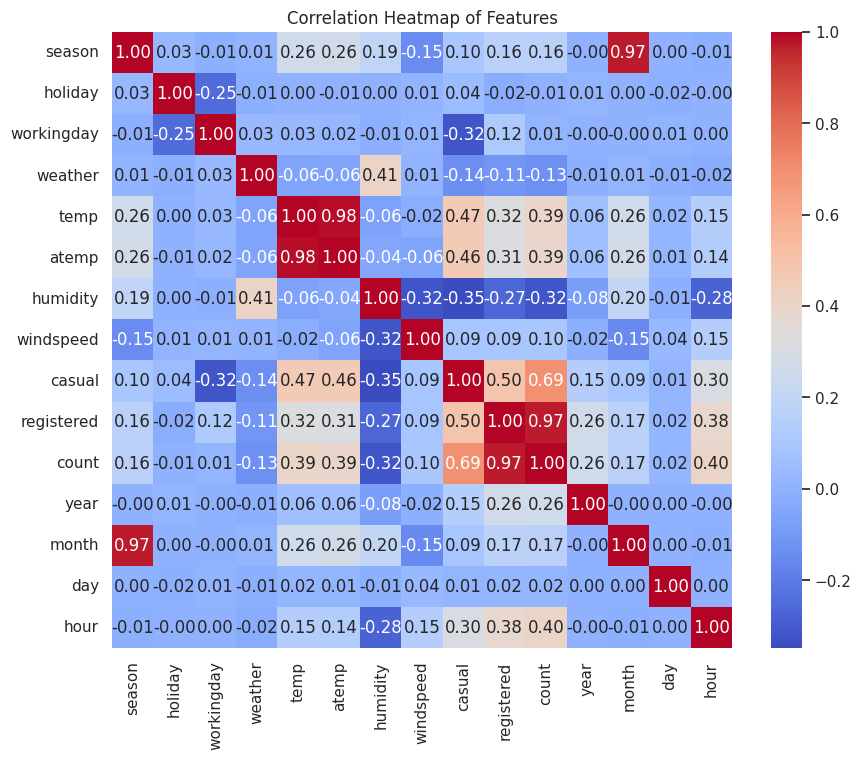

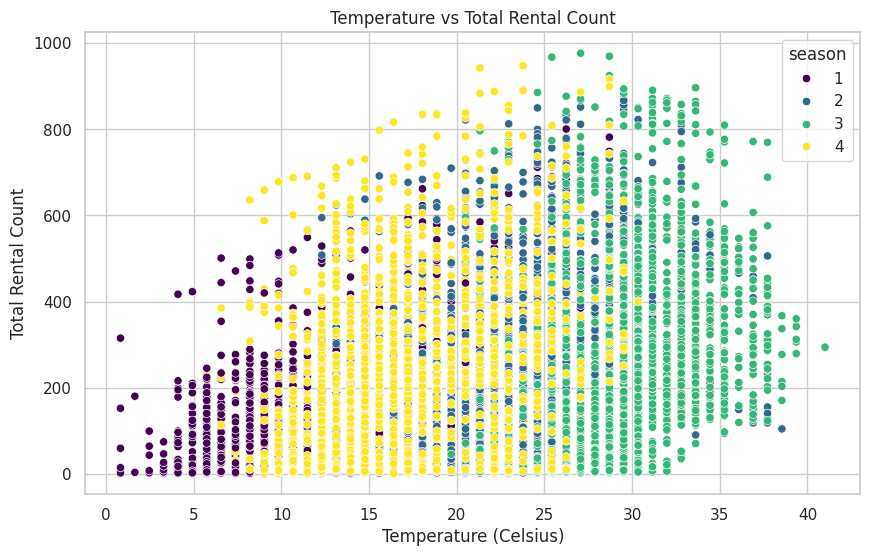

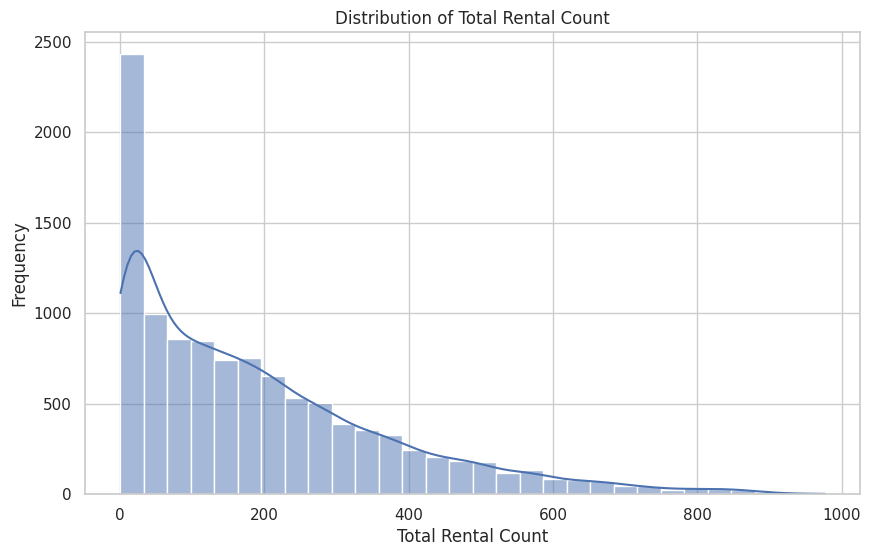

In [39]:
# Set plot style for better visuals
sns.set(style="whitegrid")

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# Plot relationship between temperature and total rental count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=train_df, hue='season', palette='viridis')
plt.title("Temperature vs Total Rental Count")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Total Rental Count")
plt.show()

# Plot rental count distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['count'], bins=30, kde=True)
plt.title("Distribution of Total Rental Count")
plt.xlabel("Total Rental Count")
plt.ylabel("Frequency")
plt.show()


## Train your model (Regression)

In [44]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the scaled training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Calculate the mean squared error and R^2 score for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2



(19945.37005375383, 0.3957218526642613)

In [45]:
# Initialize the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model using the scaled training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate the mean squared error and R^2 score for evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_knn, r2_knn


(13268.890615243341, 0.5979968976975303)

In [46]:
# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model using the scaled training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate the mean squared error and R^2 score for evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt


(3413.216253443526, 0.8965909387226985)

In [47]:
# Train a Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions and evaluate the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(1803.45156184573, 0.945361436480504)

## Test Result

In [50]:
# Perform predictions on the test set using the Linear Regression model
y_test_pred = linear_model.predict(X_test)

# Compare the predicted values with the actual values
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Display the first few rows of the result
test_results.head()


,Actual,Predicted
0,127,248.106270
1,13,48.797655
2,163,200.906767
3,233,292.785832
4,222,388.486548


In [51]:
# Test the KNN Regressor model by evaluating the predictions made on the test set

# Calculate the performance metrics for the KNN Regressor on the test set
mse_knn_test = mean_squared_error(y_test, y_pred_knn)
r2_knn_test = r2_score(y_test, y_pred_knn)

mse_knn_test, r2_knn_test


(13268.890615243341, 0.5979968976975303)

In [52]:
# Test the Decision Tree Regressor model on the testing data
y_test_pred_dt = decision_tree_model.predict(X_test)

# Calculate and return the mean squared error and R² score for the test results
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

mse_test_dt, r2_test_dt


(3413.216253443526, 0.8965909387226985)

In [53]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the scaled training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate the mean squared error and R^2 score for evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(1803.45156184573, 0.945361436480504)

## Send us the Result (Maktabkhoone)